In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import pylab as pl

In [11]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [13]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [14]:
df1=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df1.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


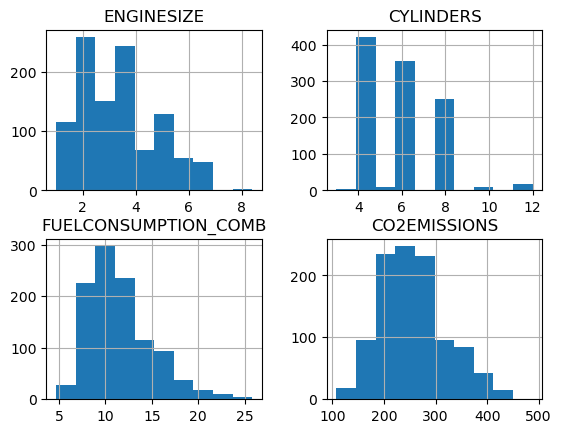

In [15]:
df1.hist()
plt.show()

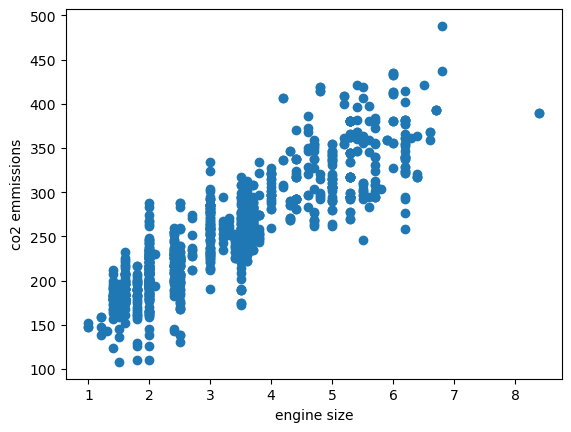

In [16]:
plt.scatter(df1["ENGINESIZE"],df1["CO2EMISSIONS"])
plt.xlabel("engine size")
plt.ylabel("co2 emmissions");


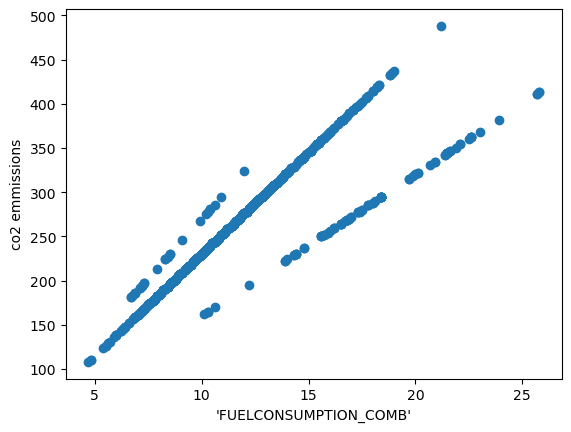

In [17]:
plt.scatter(df1['FUELCONSUMPTION_COMB'],df1["CO2EMISSIONS"])
plt.xlabel("'FUELCONSUMPTION_COMB'")
plt.ylabel("co2 emmissions");

In [18]:
#to truncate data to make Train_data and Test_data
mask =np.random.rand(len(df1)) <0.8
mask[:5]
train = df1[mask]
test = df1[~mask]
print("the length of Train_data is :",len(train))
print("the length of Test_data is :",len(test))

the length of Train_data is : 847
the length of Test_data is : 220


In [19]:
#or we use another wy to make Train_data and Test_data
y=int(len(df1)*0.8)

x= df.iloc[ :y]
z = df.iloc[y:]
print("the length of Train_data is :",len(x))
print("the length of Test_data is :",len(z))

the length of Train_data is : 853
the length of Test_data is : 214


In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X_train = np.asanyarray(train[["ENGINESIZE"]])
y_train = np.asanyarray(train[["CO2EMISSIONS"]])
model.fit(X_train,y_train)
print("the coefficient =",np.round(model.coef_,1))
print("intercept =",np.round(model.intercept_,1))

the coefficient = [[39.7]]
intercept = [123.6]


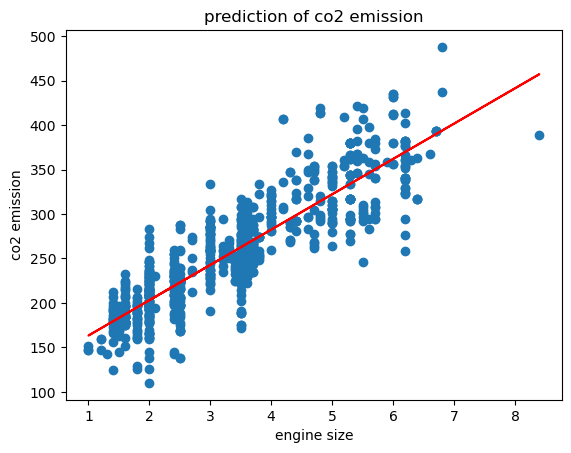

In [21]:
plt.scatter(train["ENGINESIZE"],train["CO2EMISSIONS"])
plt.plot(X_train,model.coef_*X_train + model.intercept_,"-r")#Y=aX+b  ----> a:coef and b:intercept
plt.xlabel("engine size")
plt.ylabel("co2 emission")
plt.title("prediction of co2 emission");

In [22]:
p=model.predict(X_train)
v=model.coef_[0][0]*X_train + model.intercept_[0]
print(p[:10],"\n")
print(v[:10])

[[203.03053861]
 [262.6312608 ]
 [262.6312608 ]
 [262.6312608 ]
 [262.6312608 ]
 [270.57802375]
 [270.57802375]
 [218.92406453]
 [262.6312608 ]
 [310.31183854]] 

[[203.03053861]
 [262.6312608 ]
 [262.6312608 ]
 [262.6312608 ]
 [262.6312608 ]
 [270.57802375]
 [270.57802375]
 [218.92406453]
 [262.6312608 ]
 [310.31183854]]


In [23]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
X_test = np.asanyarray(test[["ENGINESIZE"]])
y_test = np.asanyarray(test[["CO2EMISSIONS"]])
y_test_predict = model.predict(X_test)
print("the accuracy of our model is : ",r2_score(y_test_predict,y_test))
print("Mean Absolute Error = " , np.mean(np.absolute(y_test_predict-y_test)))
print("Mean Absolute Error = " , mean_absolute_error(y_test_predict,y_test))
print("mean square error = " , np.mean(np.power(y_test_predict - y_test,2)))
print("mean square error = " , mean_squared_error(y_test_predict,y_test))


the accuracy of our model is :  0.7130021380837421
Mean Absolute Error =  22.78274268517175
Mean Absolute Error =  22.78274268517175
mean square error =  922.4386064010482
mean square error =  922.4386064010482


In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report , jaccard_score , confusion_matrix ,ConfusionMatrixDisplay ,log_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing 

In [16]:
df = pd.read_csv("customer_churn_dataset-testing-master.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB
None


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [17]:
#to convert data of gender (male,female) into (0,1) to make logistic regression
df["Gender"]=preprocessing.LabelEncoder().fit(["Female","Male"]).transform(df["Gender"])
#to convert Subscription Type into label data as (0,1,2)
df["Subscription Type"]= preprocessing.LabelEncoder().fit(["Standard","Basic","Premium"]).transform(df["Subscription Type"])
#to convert contract length ("Monthly","Annual","Quarterly") into (0,1,2)
df["Contract Length"] = preprocessing.LabelEncoder().fit(["Monthly","Annual","Quarterly"]).transform(df["Contract Length"])
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,0,25,14,4,27,0,1,598,9,1
1,2,41,0,28,28,7,13,2,1,584,20,0
2,3,47,1,27,10,2,29,1,0,757,21,0
3,4,35,1,9,12,5,17,1,2,232,18,0
4,5,53,0,58,24,9,2,2,0,533,18,0


In [18]:
x= df[['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction']]
y=df["Churn"]
print("x_shape " ,x.shape)
print("y_shape ",y.shape)

x_shape  (64374, 11)
y_shape  (64374,)


In [19]:
# to generate random data in x and y
x_data = np.asarray(x)
print(x_data[:5])
y_data = np.asarray(y)
print(y_data[:5])

[[  1  22   0  25  14   4  27   0   1 598   9]
 [  2  41   0  28  28   7  13   2   1 584  20]
 [  3  47   1  27  10   2  29   1   0 757  21]
 [  4  35   1   9  12   5  17   1   2 232  18]
 [  5  53   0  58  24   9   2   2   0 533  18]]
[1 0 0 0 0]


In [20]:
#to split data into train_data and test_data
x_train , x_test , y_train , y_test  =train_test_split(x_data , y_data , test_size=0.2 , random_state=4)
print("x_train shape : ",x_train.shape)
print("y_train shape : ",y_train.shape)
print("x_text shape :",x_test.shape)
print("y_text shape :",y_test.shape)

x_train shape :  (51499, 11)
y_train shape :  (51499,)
x_text shape : (12875, 11)
y_text shape : (12875,)


In [65]:
# we use LogisticRegression in c =0.01 because smaller values specify stronger regularization.
model = LogisticRegression(C=0.1)
model.fit(x_train,y_train)
print(model)

LogisticRegression(C=0.1)


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
y_pred = model.predict(x_test)
print(y_pred[:10])
print(y_test[:10])

[1 1 1 1 1 0 0 0 1 0]
[0 1 0 1 0 0 0 1 1 0]


In [67]:
y_pred_prapola = model.predict_proba(x_test)
y_pred_prapola[:5]

array([[0.46354232, 0.53645768],
       [0.01330443, 0.98669557],
       [0.46879704, 0.53120296],
       [0.03258556, 0.96741444],
       [0.46661362, 0.53338638]])

In [69]:
jaccard = jaccard_score(y_test,y_pred)
print("the jaccard accuarcy is :",jaccard)

the jaccard accuarcy is : 0.654368164448544
